In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import cv2
import numpy as np
from scipy.ndimage import convolve
import skimage.filters as skfilters
import skimage.morphology as skmorph
from skimage.morphology import square

import sys
from matplotlib.path import Path
from scipy.ndimage import sobel, gaussian_filter, gaussian_laplace
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks
from skimage import draw
from skimage.morphology import convex_hull_image

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)
# install scikit image et scipy
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install scikit-image

Après la déclaration des librairies on commence le traitement d'image. On commence par mettre l'image dans une variable opencv

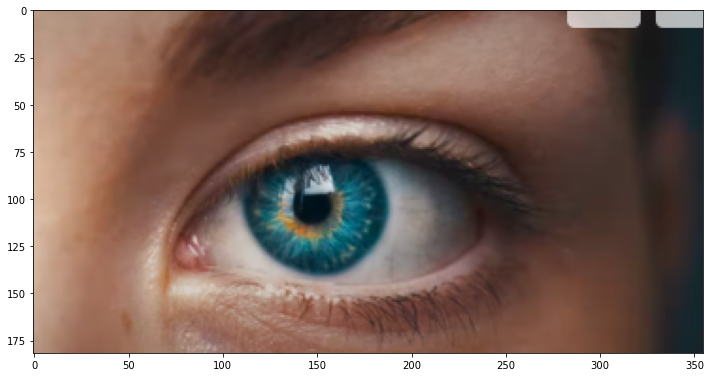

In [80]:
im_oeil=plt.imread("oeilTest.png")
fig1,ax=plt.subplots(1)
plt.imshow(im_oeil,cmap="gray")

In [82]:
def filtpb_gauss(A, fc):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    """
    M, N = A.shape

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B      

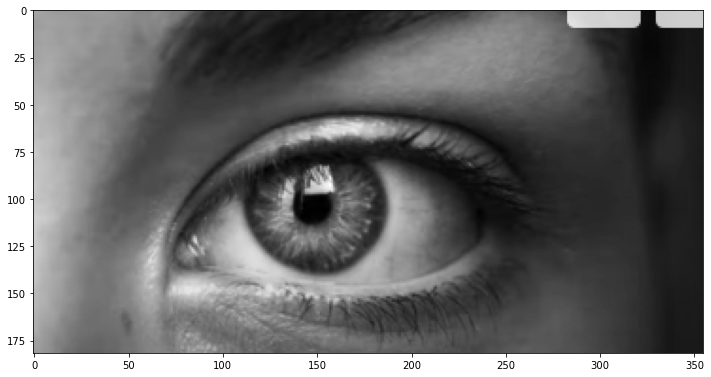

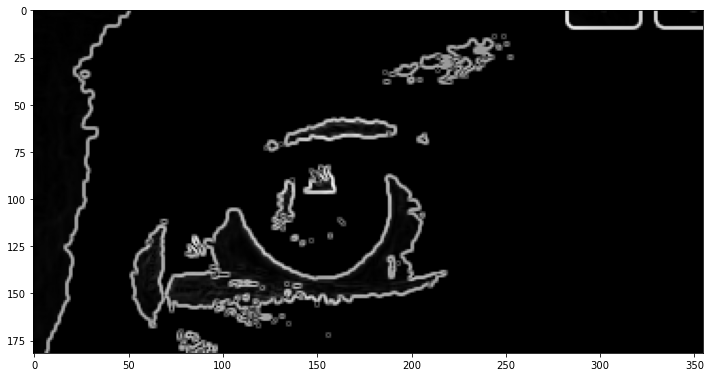

In [108]:
im_oeil_gris = cv2.cvtColor(im_oeil, cv2.COLOR_BGR2GRAY) 
fig2,ax=plt.subplots(1)
plt.imshow(im_oeil_gris,cmap="gray")

im_oeil_gris_norm = im_oeil_gris/im_oeil_gris.max()
im_oeil_gris_norm1 = im_oeil_gris_norm.copy()
im_oeil_gris_norm1[im_oeil_gris_norm1 < 0.6] = 0
sobel_v_1 = skfilters.sobel(im_oeil_gris_norm1)
fig3,ax=plt.subplots(1)
plt.imshow(sobel_v_1,cmap="gray")

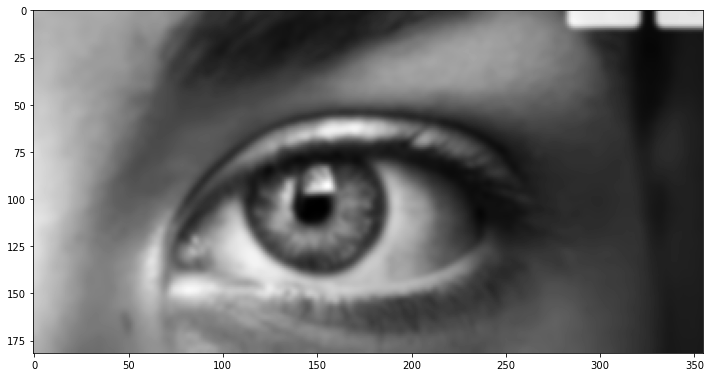

In [109]:
fc = 90
im_norm_filt = filtpb_gauss(im_oeil_gris_norm1, fc)
im_filtre = cv2.GaussianBlur(im_oeil_gris, (7, 7), 0)
im_sob_gauss = skfilters.sobel(im_norm_filt)
fig4,ax=plt.subplots(1)
plt.imshow(im_filtre,cmap="gray")


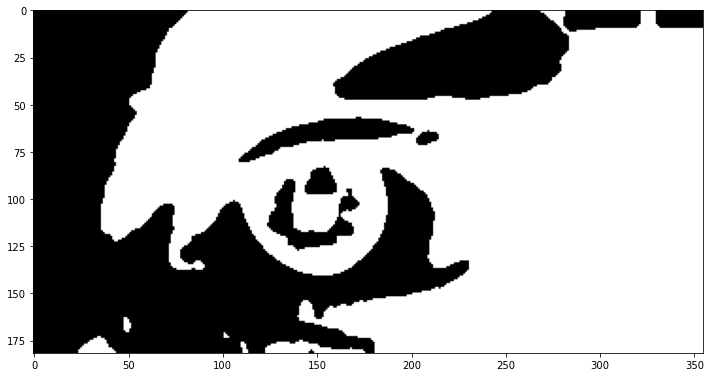

In [97]:
_, treshold = cv2.threshold(im_filtre, 0.4, 1, cv2.THRESH_BINARY_INV) 
#cv2.imshow("Suivi :", im_oeil_gris)
fig5,ax=plt.subplots(1)
plt.imshow(treshold,cmap="gray") 


123 89 51 40


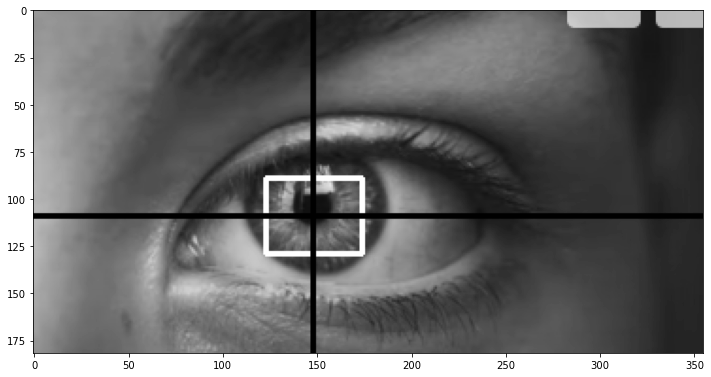

In [110]:
rows, cols = im_oeil_gris.shape
abs_dst = cv2.convertScaleAbs(treshold)
contours, _ = cv2.findContours(abs_dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours =  sorted(contours, key = lambda x : cv2.contourArea(x), reverse = True)
copie_im = im_oeil_gris.copy()
count = 0 
for cnt in contours : 
    count += 1
    (x, y, w, h) = cv2.boundingRect(cnt)
    im_oeil_gris = copie_im.copy()  
    #cv2.drawContours(im_oeil, [cnt], -1, (0, 0, 1), 1)
    cv2.rectangle(im_oeil_gris, (x,y), (x + w, y + h), (1, 0, 0), 2)
    cv2.line(im_oeil_gris, (x + int(w/2), 0), (x + int(w/2),  rows), (0, 1, 0), 2)
    cv2.line(im_oeil_gris, (0, y + int(h/2)), (cols, y + int(h/2) ), (0, 1, 0), 2)
    if count == 3 :
        print(x, y, w, h)
        break

    # if x>= 120 and w >= 160 and y<= 80 and h <= 80 :
    #     break
    
    


fig6,ax=plt.subplots(1)
plt.imshow(im_oeil_gris,cmap="gray")